# PROJECT

In [1669]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats.mstats import winsorize
from pandas import plotting
#import statsmodels.formula.api as sm
import statsmodels.api as sm

import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

import statsmodels.api as sm1
from linearmodels import PanelOLS
from sklearn.linear_model import LinearRegression

import seaborn as sns

In [1670]:
"""
data = pd.read_csv("SDC_NorthAmerica_1992to1995_v5_nasim.csv")
data2=pd.read_csv("SDC_NorthAmerica_1996to1998_v5_nasim.csv")
data3= pd.read_csv("SDC_NorthAmerica_1999to2000_v5_nasim.csv")
data4=pd.read_csv("SDC_NorthAmerica_2001to2003_v5_nasim.csv")
data5= pd.read_csv("SDC_NorthAmerica_2004to2005_v5_nasim.csv")

data.columns = [c.replace("\n", "_") for c in data.columns]
data.columns = [c.replace("  ", "") for c in data.columns]


data2.columns = [c.replace("\n", "_") for c in data2.columns]
data2.columns = [c.replace("  ", "") for c in data2.columns]


data3.columns = [c.replace("\n", "_") for c in data3.columns]
data3.columns = [c.replace("  ", "") for c in data3.columns]


data4.columns = [c.replace("\n", "_") for c in data4.columns]
data4.columns = [c.replace("  ", "") for c in data4.columns]


data5.columns = [c.replace("\n", "_") for c in data5.columns]
data5.columns = [c.replace("  ", "") for c in data5.columns]

df = pd.concat([data, data2,data3,data4,data5], ignore_index=True, sort=False)
#df=pd.read_csv('SDC_NorthAmerica_1999to2001_v7.csv')
#df.columns = [c.replace("\n", "_") for c in df.columns]
#df.columns = [c.replace("  ", "") for c in df.columns]
#df.to_csv("test12.csv" ,index=None,sep=',',mode='w')
df=df. replace(np. nan,0)
df
"""

'\ndata = pd.read_csv("SDC_NorthAmerica_1992to1995_v5_nasim.csv")\ndata2=pd.read_csv("SDC_NorthAmerica_1996to1998_v5_nasim.csv")\ndata3= pd.read_csv("SDC_NorthAmerica_1999to2000_v5_nasim.csv")\ndata4=pd.read_csv("SDC_NorthAmerica_2001to2003_v5_nasim.csv")\ndata5= pd.read_csv("SDC_NorthAmerica_2004to2005_v5_nasim.csv")\n\ndata.columns = [c.replace("\n", "_") for c in data.columns]\ndata.columns = [c.replace("  ", "") for c in data.columns]\n\n\ndata2.columns = [c.replace("\n", "_") for c in data2.columns]\ndata2.columns = [c.replace("  ", "") for c in data2.columns]\n\n\ndata3.columns = [c.replace("\n", "_") for c in data3.columns]\ndata3.columns = [c.replace("  ", "") for c in data3.columns]\n\n\ndata4.columns = [c.replace("\n", "_") for c in data4.columns]\ndata4.columns = [c.replace("  ", "") for c in data4.columns]\n\n\ndata5.columns = [c.replace("\n", "_") for c in data5.columns]\ndata5.columns = [c.replace("  ", "") for c in data5.columns]\n\ndf = pd.concat([data, data2,data3,data

In [1671]:
df=pd.read_csv("SDC_NorthAmerica_1990to2005_v8.csv")
df.columns = [c.replace("\n", "_") for c in df.columns]
df.columns = [c.replace("  ", "") for c in df.columns]
df=df.replace(np.NaN ,0)
df=df.dropna()
df


,Date_Announced,Date_Effective,Target Name,Target_Primary_SIC_ Code,Target State,Target_Nation,Acquiror Name,Acquiror_Primary_SIC_Code,Acquiror State,Acquiror_ Nation,...,Ratio of_Price_Book_Premium_to Book_Value,Price_ Per_Share,Target_Lockup Price_(US $),Target_Price_High,Target_Share Price_1 Day_Prior to_Announcement_($),Target_Share Price_1 Week_Prior to_Announcement_($),Number of_ Consid-_erations_Offered,Common_ Shares_Acquired_ (mil),Cost to_Acquire_Common_($mil),Target_Public_Status
0,02/01/90,12/12/90,"First Fed S&L,Council Bluffs",6035,Iowa,United States,Metropolitan Financial Corp,6021,Ohio,United States,...,-16.602,18.25,0.0,0.0,0.000,0.000,1.0,.44,8.1,Public
1,03/01/90,03/01/90,Angeles Corp,6531,California,United States,Angeles Corp,6531,California,United States,...,-41.945,6.00,0.0,0.0,7.000,7.250,1.0,.37,2.1,Public
2,03/01/90,05/03/90,Angeles Corp,6531,California,United States,Angeles Corp,6531,California,United States,...,np,0,0.0,0.0,7.000,7.250,3.0,0,0,Public
3,03/01/90,03/01/90,Elsinore Corp,7011,Nevada,United States,Goldsmith Financial Corp,6211,Unknown,United States,...,np,0,0.0,0.0,0.625,0.563,1.0,7.46,0,Public
4,03/01/90,03/01/90,Superior Teletec Inc,3357,Georgia,United States,Superior Teletec Inc,3357,Georgia,United States,...,nm,1.90,0.0,0.0,3.125,2.750,1.0,1.57,0,Public
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16546,29/12/05,29/12/05,Cape Coastal Trading Corp,6799,California,United States,uBID Inc,5961.0,Illinois,United States,...,np,0,0.0,0.0,0.000,0.000,1.0,2.3,0,Public
16547,29/12/05,03/04/06,Hemlock Federal Financial Corp,6035,Illinois,United States,Marquette National Corp,6712.0,Illinois,United States,...,2295.339,55.5,0.0,0.0,27.000,27.000,1.0,1.1,51.3,Public
16548,29/12/05,29/12/05,Standard Motor Products Inc,3714,New York,United States,Standard Motor Products Inc,3714.0,New York,United States,...,-12.474,9.22,0.0,0.0,9.220,9.250,1.0,1.38,12.7,Public
16549,30/12/05,03/05/06,Anchor Glass Container Corp,3221,Florida,United States,Creditors,6799.0,Foreign,United States,...,np,0,0.0,0.0,0.215,0.230,1.0,0,0,Public


In [1672]:
#remove string from SIC colomn 
df['Target_Primary_SIC_ Code'] =df['Target_Primary_SIC_ Code'].str.replace('A', '')
df['Target_Primary_SIC_ Code'] =df['Target_Primary_SIC_ Code'].str.replace('B', '')
df['Target_Primary_SIC_ Code'] =df['Target_Primary_SIC_ Code'].str.replace('C', '')
df['Target_Primary_SIC_ Code'] =df['Target_Primary_SIC_ Code'].str.replace('D', '')
df['Target_Primary_SIC_ Code'] =df['Target_Primary_SIC_ Code'].str.replace('E', '')
df['Target_Primary_SIC_ Code'] =df['Target_Primary_SIC_ Code'].str.replace('F', '')
df['Target_Primary_SIC_ Code'] =df['Target_Primary_SIC_ Code'].str.replace('G', '')
df['Target_Primary_SIC_ Code'] =df['Target_Primary_SIC_ Code'].str.replace('H', '')
df['Target_Primary_SIC_ Code'] =df['Target_Primary_SIC_ Code'].str.replace('I', '')
df['Target_Primary_SIC_ Code'] =df['Target_Primary_SIC_ Code'].str.replace('J', '')
df['Target_Primary_SIC_ Code'] =df['Target_Primary_SIC_ Code'].str.replace('K', '')
df['Target_Primary_SIC_ Code'] =df['Target_Primary_SIC_ Code'].str.replace('L', '')
df['Target_Primary_SIC_ Code'] =df['Target_Primary_SIC_ Code'].str.replace('M', '')
df['Target_Primary_SIC_ Code'] =df['Target_Primary_SIC_ Code'].str.replace('N', '')
df['Target_Primary_SIC_ Code'] =df['Target_Primary_SIC_ Code'].str.replace('O', '')
df['Target_Primary_SIC_ Code'] =df['Target_Primary_SIC_ Code'].str.replace('P', '')
df['Target_Primary_SIC_ Code'] =df['Target_Primary_SIC_ Code'].str.replace('Q', '')
df['Target_Primary_SIC_ Code'] =df['Target_Primary_SIC_ Code'].str.replace('R', '')
df['Target_Primary_SIC_ Code'] =df['Target_Primary_SIC_ Code'].str.replace('S', '')
df['Target_Primary_SIC_ Code'] =df['Target_Primary_SIC_ Code'].str.replace('T', '')
df['Target_Primary_SIC_ Code'] =df['Target_Primary_SIC_ Code'].str.replace('U', '')
df['Target_Primary_SIC_ Code'] =df['Target_Primary_SIC_ Code'].str.replace('V', '')
df['Target_Primary_SIC_ Code'] =df['Target_Primary_SIC_ Code'].str.replace('W', '')
df['Target_Primary_SIC_ Code'] =df['Target_Primary_SIC_ Code'].str.replace('X', '')
df['Target_Primary_SIC_ Code'] =df['Target_Primary_SIC_ Code'].str.replace('Y', '')
df['Target_Primary_SIC_ Code'] =df['Target_Primary_SIC_ Code'].str.replace('Z', '')

#df['Target_Primary_SIC_ Code']=df['Target_Primary_SIC_ Code'].astype(int)
df['Target_Primary_SIC_ Code']=df['Target_Primary_SIC_ Code'].astype(np.float).astype("Int32")
#remove string from SIC colomn -acquirer


df['Acquiror_Primary_SIC_Code'] =df['Acquiror_Primary_SIC_Code'].str.replace('A', '')
df['Acquiror_Primary_SIC_Code'] =df['Acquiror_Primary_SIC_Code'].str.replace('B', '')
df['Acquiror_Primary_SIC_Code'] =df['Acquiror_Primary_SIC_Code'].str.replace('C', '')
df['Acquiror_Primary_SIC_Code'] =df['Acquiror_Primary_SIC_Code'].str.replace('D', '')
df['Acquiror_Primary_SIC_Code'] =df['Acquiror_Primary_SIC_Code'].str.replace('E', '')
df['Acquiror_Primary_SIC_Code'] =df['Acquiror_Primary_SIC_Code'].str.replace('F', '')
df['Acquiror_Primary_SIC_Code'] =df['Acquiror_Primary_SIC_Code'].str.replace('G', '')
df['Acquiror_Primary_SIC_Code'] =df['Acquiror_Primary_SIC_Code'].str.replace('H', '')
df['Acquiror_Primary_SIC_Code'] =df['Acquiror_Primary_SIC_Code'].str.replace('I', '')
df['Acquiror_Primary_SIC_Code'] =df['Acquiror_Primary_SIC_Code'].str.replace('J', '')
df['Acquiror_Primary_SIC_Code'] =df['Acquiror_Primary_SIC_Code'].str.replace('K', '')
df['Acquiror_Primary_SIC_Code'] =df['Acquiror_Primary_SIC_Code'].str.replace('L', '')
df['Acquiror_Primary_SIC_Code'] =df['Acquiror_Primary_SIC_Code'].str.replace('M', '')
df['Acquiror_Primary_SIC_Code'] =df['Acquiror_Primary_SIC_Code'].str.replace('N', '')
df['Acquiror_Primary_SIC_Code'] =df['Acquiror_Primary_SIC_Code'].str.replace('O', '')
df['Acquiror_Primary_SIC_Code'] =df['Acquiror_Primary_SIC_Code'].str.replace('P', '')
df['Acquiror_Primary_SIC_Code'] =df['Acquiror_Primary_SIC_Code'].str.replace('Q', '')
df['Acquiror_Primary_SIC_Code'] =df['Acquiror_Primary_SIC_Code'].str.replace('R', '')
df['Acquiror_Primary_SIC_Code'] =df['Acquiror_Primary_SIC_Code'].str.replace('S', '')
df['Acquiror_Primary_SIC_Code'] =df['Acquiror_Primary_SIC_Code'].str.replace('T', '')
df['Acquiror_Primary_SIC_Code'] =df['Acquiror_Primary_SIC_Code'].str.replace('U', '')
df['Acquiror_Primary_SIC_Code'] =df['Acquiror_Primary_SIC_Code'].str.replace('V', '')
df['Acquiror_Primary_SIC_Code'] =df['Acquiror_Primary_SIC_Code'].str.replace('W', '')
df['Acquiror_Primary_SIC_Code'] =df['Acquiror_Primary_SIC_Code'].str.replace('X', '')
df['Acquiror_Primary_SIC_Code'] =df['Acquiror_Primary_SIC_Code'].str.replace('Y', '')
df['Acquiror_Primary_SIC_Code'] =df['Acquiror_Primary_SIC_Code'].str.replace('Z', '')

#df['Acquiror_Primary_SIC_Code'] =df['Acquiror_Primary_SIC_Code'].astype(int)
df['Acquiror_Primary_SIC_Code'] =df['Acquiror_Primary_SIC_Code'].astype(np.float).astype("Int32")
df


,Date_Announced,Date_Effective,Target Name,Target_Primary_SIC_ Code,Target State,Target_Nation,Acquiror Name,Acquiror_Primary_SIC_Code,Acquiror State,Acquiror_ Nation,...,Ratio of_Price_Book_Premium_to Book_Value,Price_ Per_Share,Target_Lockup Price_(US $),Target_Price_High,Target_Share Price_1 Day_Prior to_Announcement_($),Target_Share Price_1 Week_Prior to_Announcement_($),Number of_ Consid-_erations_Offered,Common_ Shares_Acquired_ (mil),Cost to_Acquire_Common_($mil),Target_Public_Status
0,02/01/90,12/12/90,"First Fed S&L,Council Bluffs",6035,Iowa,United States,Metropolitan Financial Corp,6021,Ohio,United States,...,-16.602,18.25,0.0,0.0,0.000,0.000,1.0,.44,8.1,Public
1,03/01/90,03/01/90,Angeles Corp,6531,California,United States,Angeles Corp,6531,California,United States,...,-41.945,6.00,0.0,0.0,7.000,7.250,1.0,.37,2.1,Public
2,03/01/90,05/03/90,Angeles Corp,6531,California,United States,Angeles Corp,6531,California,United States,...,np,0,0.0,0.0,7.000,7.250,3.0,0,0,Public
3,03/01/90,03/01/90,Elsinore Corp,7011,Nevada,United States,Goldsmith Financial Corp,6211,Unknown,United States,...,np,0,0.0,0.0,0.625,0.563,1.0,7.46,0,Public
4,03/01/90,03/01/90,Superior Teletec Inc,3357,Georgia,United States,Superior Teletec Inc,3357,Georgia,United States,...,nm,1.90,0.0,0.0,3.125,2.750,1.0,1.57,0,Public
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16546,29/12/05,29/12/05,Cape Coastal Trading Corp,6799,California,United States,uBID Inc,<NA>,Illinois,United States,...,np,0,0.0,0.0,0.000,0.000,1.0,2.3,0,Public
16547,29/12/05,03/04/06,Hemlock Federal Financial Corp,6035,Illinois,United States,Marquette National Corp,<NA>,Illinois,United States,...,2295.339,55.5,0.0,0.0,27.000,27.000,1.0,1.1,51.3,Public
16548,29/12/05,29/12/05,Standard Motor Products Inc,3714,New York,United States,Standard Motor Products Inc,<NA>,New York,United States,...,-12.474,9.22,0.0,0.0,9.220,9.250,1.0,1.38,12.7,Public
16549,30/12/05,03/05/06,Anchor Glass Container Corp,3221,Florida,United States,Creditors,<NA>,Foreign,United States,...,np,0,0.0,0.0,0.215,0.230,1.0,0,0,Public


In [1673]:

#df['Target_Primary_SIC_ Code'] = pd.Series(df['Target_Primary_SIC_ Code'])
#df['Target_Primary_SIC_ Code'] = df['Target_Primary_SIC_ Code'].fillna(0).astype(int)

#df['Acquiror_Primary_SIC_Code'] = pd.Series(df['Acquiror_Primary_SIC_Code'])
#df['Acquiror_Primary_SIC_Code'] = df['Acquiror_Primary_SIC_Code'].fillna(0).astype(int)

if df['Acquiror_Primary_SIC_Code'].isnull().any():
    # Perform any necessary preprocessing to handle missing values
    df['Acquiror_Primary_SIC_Code'].fillna(value=0, inplace=True)
    
if df['Target_Primary_SIC_ Code'].isnull().any():
    # Perform any necessary preprocessing to handle missing values
    df['Target_Primary_SIC_ Code'].fillna(value=0, inplace=True)

In [1674]:
dftotal=df.copy()

dftotal['financial-t'] = np.where((df['Target_Primary_SIC_ Code'] >= 4900) & (df['Target_Primary_SIC_ Code'] < 4949), 1, 0)

dftotal['financial-a'] = np.where((df['Acquiror_Primary_SIC_Code'] >= 4900) & (df['Acquiror_Primary_SIC_Code'] < 4949), 1, 0)
dftotal['utility-t'] = np.where((df['Target_Primary_SIC_ Code'] >= 6000) & (df['Target_Primary_SIC_ Code'] < 6999), 1, 0)
dftotal['utility-a'] = np.where((df['Acquiror_Primary_SIC_Code'] >= 6000) & (df['Acquiror_Primary_SIC_Code'] < 6999), 1, 0)

dftotal=dftotal.set_index('Target Name')


#Drop all unnecessary firms
sdc = dftotal[(dftotal['financial-t'] != 1)&(dftotal['financial-a'] != 1)&(dftotal['utility-t'] != 1)&(dftotal['utility-a'] != 1)]

sdc
#sdc.to_csv("test9.csv", header=None,index=None,sep=',',mode='w')
#sdc

,Date_Announced,Date_Effective,Target_Primary_SIC_ Code,Target State,Target_Nation,Acquiror Name,Acquiror_Primary_SIC_Code,Acquiror State,Acquiror_ Nation,% of_Shares_Acq.,...,Target_Share Price_1 Day_Prior to_Announcement_($),Target_Share Price_1 Week_Prior to_Announcement_($),Number of_ Consid-_erations_Offered,Common_ Shares_Acquired_ (mil),Cost to_Acquire_Common_($mil),Target_Public_Status,financial-t,financial-a,utility-t,utility-a
Target Name,,,,,,,,,,,,,,,,,,,,,
Superior Teletec Inc,03/01/90,03/01/90,3357,Georgia,United States,Superior Teletec Inc,3357,Georgia,United States,15.00,...,3.125,2.750,1.0,1.57,0,Public,0,0,0,0
Aviation Group Inc,04/01/90,04/01/90,4581,Texas,United States,Ryan International Airlines,4512,Kansas,United States,100.00,...,0.000,0.000,1.0,0,0,Public,0,0,0,0
Plains Resources Inc,04/01/90,04/01/90,1311,Texas,United States,Plains Resources Inc,1311,Texas,United States,0.00,...,1.188,1.125,1.0,0,4.2,Public,0,0,0,0
IDB Communications Group Inc,05/01/90,31/12/90,4813,California,United States,Teleglobe International US Inc,3661,Unknown,United States,20.00,...,8.750,8.500,1.0,2.02,13.0,Public,0,0,0,0
MGF Oil Corp(Southmark Corp),08/01/90,30/03/90,1311,Texas,United States,Kaiser-Francis Oil Co,1311,Oklahoma,United States,100.00,...,0.000,0.000,2.0,353.30,24.7,Public,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Webhire Inc,21/12/05,01/01/06,7372,Massachusetts,United States,Kenexa Corp,0,Pennsylvania,United States,100.00,...,0.800,1.000,1.0,0,0,Public,0,0,0,0
Riviera Holdings Corp,22/12/05,08/08/06,7011,Nevada,United States,Investor Group,0,Foreign,United States,8.06,...,14.020,13.850,1.0,1.0,15.0,Public,0,0,0,0
Standard Motor Products Inc,29/12/05,29/12/05,3714,New York,United States,Standard Motor Products Inc,0,New York,United States,6.95,...,9.220,9.250,1.0,1.38,12.7,Public,0,0,0,0


In [1675]:

for col in sdc.columns:
    print(col)

Date_Announced
Date_Effective
Target_Primary_SIC_ Code
Target State
Target_Nation
Acquiror Name
Acquiror_Primary_SIC_Code
Acquiror State
Acquiror_ Nation
 % of_Shares_Acq.
%_Owned_After_Trans-_action
Enterprise_Value_($mil)
Acquiror_ CUSIP
Target_CUSIP
Acquiror_Datastream_Code
Target_Datastream_Code
Acquiror_Primary_Ticker_Symbol
Acquiror_Ticker_Symbol
Target_Primary_Ticker_Symbol
Target_Ticker_Symbol
Value of_Transaction_($mil)
Value_Source_Date
Value_of_ Deal_excl._ Cap._ Inf._($mil)
Value_Est.
Enterprise_Value at_Announcement_($mil)
Enterprise_Value_($mil).1
Acquiror_Book Value_ LTM_($ mil)
Analyst _Estimated _Value ($mil)
Firm_Value_($mil)
Tgt. Market Val_4 Wwks Prior to_Announcement($ mil)
Acq Closing_Price_1 Day_Prior to_ Ann($)
Acq Closing_Price_1 Wk_Prior to_ Ann($)
Acq Closing_Price_4 Wks_Prior to_ Ann($)
%_sought
Acq Closing_ Price 1 Day_ Prior To_ Ann(Host Curr)
Pct Owned_by Acquiror_Post Merger
High Tech Industry
High Tech Industry.1
Final_Consideration_Structure_(Descripti

In [1676]:

sdc=sdc[['Date_Effective','Target_Primary_SIC_ Code','Acquiror Name','Target_CUSIP','Acquiror_Primary_SIC_Code','Enterprise_Value_($mil)','High Tech Industry.1','Final_Consideration_Structure_(Description)','Value_of_ Deal_excl._ Cap._ Inf._($mil)','Offer Price_to Target_Stock Price_Premium_4 Weeks_Prior to_Announcement',' % of_Shares_Acq.','Tgt. Market Val_4 Wwks Prior to_Announcement($ mil)','Offer Price_to Target_Stock Price_Premium_1 Week_Prior to_Announcement','Offer Price_to Target_Stock Price_Premium_1 Day_Prior to_Announcement']]

sdc

,Date_Effective,Target_Primary_SIC_ Code,Acquiror Name,Target_CUSIP,Acquiror_Primary_SIC_Code,Enterprise_Value_($mil),High Tech Industry.1,Final_Consideration_Structure_(Description),Value_of_ Deal_excl._ Cap._ Inf._($mil),Offer Price_to Target_Stock Price_Premium_4 Weeks_Prior to_Announcement,% of_Shares_Acq.,Tgt. Market Val_4 Wwks Prior to_Announcement($ mil),Offer Price_to Target_Stock Price_Premium_1 Week_Prior to_Announcement,Offer Price_to Target_Stock Price_Premium_1 Day_Prior to_Announcement
Target Name,,,,,,,,,,,,,,
Superior Teletec Inc,03/01/90,3357,Superior Teletec Inc,868367,3357,53.850,Telephone Interconnect Equip,Unknown,3.0,-20.0,15.00,24.826,-30.91,-39.2
Aviation Group Inc,04/01/90,4581,Ryan International Airlines,053667,4512,np,Primary Business not Hi-Tech,Other,3.5,0,100.00,0,0,0
Plains Resources Inc,04/01/90,1311,Plains Resources Inc,726540,1311,np,Primary Business not Hi-Tech,Stock Only,4.2,0,0.00,0,0,0
IDB Communications Group Inc,31/12/90,4813,Teleglobe International US Inc,449355,3661,165.474,Primary Business not Hi-Tech,Unknown,13.0,0,20.00,70.721,0,0
MGF Oil Corp(Southmark Corp),30/03/90,1311,Kaiser-Francis Oil Co,552813,1311,31.799,Primary Business not Hi-Tech,Other,24.7,0,100.00,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Webhire Inc,01/01/06,7372,Kenexa Corp,94768W,0,np,Other Software (inq. Games),Cash Only,34.0,0,100.00,0,0,0
Riviera Holdings Corp,08/08/06,7011,Investor Group,769627,0,375.001,Primary Business not Hi-Tech,Cash Only,15.0,1.49,8.06,183.483,8.3,6.99
Standard Motor Products Inc,29/12/05,3714,Standard Motor Products Inc,853666,0,461.475,Primary Business not Hi-Tech,Unknown,12.7,2.22,6.95,179.044,-0.32,0.0


In [1677]:

count = (sdc['Value_of_ Deal_excl._ Cap._ Inf._($mil)'] == 0).sum()
count



904

In [1678]:
width = 6
sdc['Target_CUSIP'] = sdc['Target_CUSIP'].apply(lambda x: str(x).zfill(width))

In [1679]:
#sdc['Target_CUSIP'] = sdc['Target_CUSIP'].apply(lambda x: x.zfill(6))

#sdc


In [1680]:
sdc=sdc.rename({'Target_CUSIP':'tCUSIP'}, axis=1)
sdc

,Date_Effective,Target_Primary_SIC_ Code,Acquiror Name,tCUSIP,Acquiror_Primary_SIC_Code,Enterprise_Value_($mil),High Tech Industry.1,Final_Consideration_Structure_(Description),Value_of_ Deal_excl._ Cap._ Inf._($mil),Offer Price_to Target_Stock Price_Premium_4 Weeks_Prior to_Announcement,% of_Shares_Acq.,Tgt. Market Val_4 Wwks Prior to_Announcement($ mil),Offer Price_to Target_Stock Price_Premium_1 Week_Prior to_Announcement,Offer Price_to Target_Stock Price_Premium_1 Day_Prior to_Announcement
Target Name,,,,,,,,,,,,,,
Superior Teletec Inc,03/01/90,3357,Superior Teletec Inc,868367,3357,53.850,Telephone Interconnect Equip,Unknown,3.0,-20.0,15.00,24.826,-30.91,-39.2
Aviation Group Inc,04/01/90,4581,Ryan International Airlines,053667,4512,np,Primary Business not Hi-Tech,Other,3.5,0,100.00,0,0,0
Plains Resources Inc,04/01/90,1311,Plains Resources Inc,726540,1311,np,Primary Business not Hi-Tech,Stock Only,4.2,0,0.00,0,0,0
IDB Communications Group Inc,31/12/90,4813,Teleglobe International US Inc,449355,3661,165.474,Primary Business not Hi-Tech,Unknown,13.0,0,20.00,70.721,0,0
MGF Oil Corp(Southmark Corp),30/03/90,1311,Kaiser-Francis Oil Co,552813,1311,31.799,Primary Business not Hi-Tech,Other,24.7,0,100.00,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Webhire Inc,01/01/06,7372,Kenexa Corp,94768W,0,np,Other Software (inq. Games),Cash Only,34.0,0,100.00,0,0,0
Riviera Holdings Corp,08/08/06,7011,Investor Group,769627,0,375.001,Primary Business not Hi-Tech,Cash Only,15.0,1.49,8.06,183.483,8.3,6.99
Standard Motor Products Inc,29/12/05,3714,Standard Motor Products Inc,853666,0,461.475,Primary Business not Hi-Tech,Unknown,12.7,2.22,6.95,179.044,-0.32,0.0


In [1681]:

sdc['Date_Effective']=pd.to_datetime(sdc.Date_Effective)
sdc['Date_Effective']
sdc['Year'] = sdc['Date_Effective'].dt.strftime('%Y')
sdc['Year']



#sdc=sdc.set_index('CUSIP')
sdc

,Date_Effective,Target_Primary_SIC_ Code,Acquiror Name,tCUSIP,Acquiror_Primary_SIC_Code,Enterprise_Value_($mil),High Tech Industry.1,Final_Consideration_Structure_(Description),Value_of_ Deal_excl._ Cap._ Inf._($mil),Offer Price_to Target_Stock Price_Premium_4 Weeks_Prior to_Announcement,% of_Shares_Acq.,Tgt. Market Val_4 Wwks Prior to_Announcement($ mil),Offer Price_to Target_Stock Price_Premium_1 Week_Prior to_Announcement,Offer Price_to Target_Stock Price_Premium_1 Day_Prior to_Announcement,Year
Target Name,,,,,,,,,,,,,,,
Superior Teletec Inc,1990-03-01,3357,Superior Teletec Inc,868367,3357,53.850,Telephone Interconnect Equip,Unknown,3.0,-20.0,15.00,24.826,-30.91,-39.2,1990
Aviation Group Inc,1990-04-01,4581,Ryan International Airlines,053667,4512,np,Primary Business not Hi-Tech,Other,3.5,0,100.00,0,0,0,1990
Plains Resources Inc,1990-04-01,1311,Plains Resources Inc,726540,1311,np,Primary Business not Hi-Tech,Stock Only,4.2,0,0.00,0,0,0,1990
IDB Communications Group Inc,1990-12-31,4813,Teleglobe International US Inc,449355,3661,165.474,Primary Business not Hi-Tech,Unknown,13.0,0,20.00,70.721,0,0,1990
MGF Oil Corp(Southmark Corp),1990-03-30,1311,Kaiser-Francis Oil Co,552813,1311,31.799,Primary Business not Hi-Tech,Other,24.7,0,100.00,0,0,0,1990
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Webhire Inc,2006-01-01,7372,Kenexa Corp,94768W,0,np,Other Software (inq. Games),Cash Only,34.0,0,100.00,0,0,0,2006
Riviera Holdings Corp,2006-08-08,7011,Investor Group,769627,0,375.001,Primary Business not Hi-Tech,Cash Only,15.0,1.49,8.06,183.483,8.3,6.99,2006
Standard Motor Products Inc,2005-12-29,3714,Standard Motor Products Inc,853666,0,461.475,Primary Business not Hi-Tech,Unknown,12.7,2.22,6.95,179.044,-0.32,0.0,2005


In [1682]:
#Execucomp
cucomp = pd.read_csv("execucomp3.csv")

cucomp

,Full Name,ID number for each executive/company combination,Company Name,OPT_UNEX_EXER_NUM,OPT_UNEX_EXER_EST_VAL,Total Compensation (Salary + Bonus + Other Annual + Restriced Stock Grants + LTIP Payouts + All Other + Value of Option Grants),GVKEY,Executive ID number,Fiscal Year,Last Name,First Name,CUSIP and Issue Number,Ticker Symbol,SIC Code
0,Ira A. Eichner,5622,AAR CORP,24.400,36.400,NaN,1004,9248,1992,Eichner,Ira,36110,AIR,5080
1,David P. Storch,5623,AAR CORP,16.220,29.775,NaN,1004,9249,1992,Storch,David,36110,AIR,5080
2,Philip C. Slapke,5624,AAR CORP,NaN,NaN,NaN,1004,9250,1992,Slapke,Philip,36110,AIR,5080
3,Howard A. Pulsifer,5625,AAR CORP,5.726,10.941,NaN,1004,9251,1992,Pulsifer,Howard,36110,AIR,5080
4,Timothy J. Romenesko,5626,AAR CORP,NaN,NaN,NaN,1004,9252,1992,Romenesko,Timothy,36110,AIR,5080
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
154920,Kenneth J. Kay,31867,CBRE GROUP INC,0.000,0.000,1555.000,260774,21562,2005,Kay,Kenneth,12504L10,CBRE,6500
154921,"Calvin W. Frese, Jr.",31868,CBRE GROUP INC,50.053,2448.187,1929.498,260774,30554,2005,"Frese, Jr.",Calvin,12504L10,CBRE,6500
154922,Robert Blain,31869,CBRE GROUP INC,35.212,1743.782,1541.615,260774,30555,2005,Blain,Robert,12504L10,CBRE,6500
154923,Alan C. Froggatt,31870,CBRE GROUP INC,0.000,0.000,863.033,260774,30556,2005,Froggatt,Alan,12504L10,CBRE,6500


In [1683]:
cucomp['CUSIP and Issue Number'] = cucomp['CUSIP and Issue Number'].apply(lambda x: x.zfill(8))
cucomp


,Full Name,ID number for each executive/company combination,Company Name,OPT_UNEX_EXER_NUM,OPT_UNEX_EXER_EST_VAL,Total Compensation (Salary + Bonus + Other Annual + Restriced Stock Grants + LTIP Payouts + All Other + Value of Option Grants),GVKEY,Executive ID number,Fiscal Year,Last Name,First Name,CUSIP and Issue Number,Ticker Symbol,SIC Code
0,Ira A. Eichner,5622,AAR CORP,24.400,36.400,NaN,1004,9248,1992,Eichner,Ira,00036110,AIR,5080
1,David P. Storch,5623,AAR CORP,16.220,29.775,NaN,1004,9249,1992,Storch,David,00036110,AIR,5080
2,Philip C. Slapke,5624,AAR CORP,NaN,NaN,NaN,1004,9250,1992,Slapke,Philip,00036110,AIR,5080
3,Howard A. Pulsifer,5625,AAR CORP,5.726,10.941,NaN,1004,9251,1992,Pulsifer,Howard,00036110,AIR,5080
4,Timothy J. Romenesko,5626,AAR CORP,NaN,NaN,NaN,1004,9252,1992,Romenesko,Timothy,00036110,AIR,5080
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
154920,Kenneth J. Kay,31867,CBRE GROUP INC,0.000,0.000,1555.000,260774,21562,2005,Kay,Kenneth,12504L10,CBRE,6500
154921,"Calvin W. Frese, Jr.",31868,CBRE GROUP INC,50.053,2448.187,1929.498,260774,30554,2005,"Frese, Jr.",Calvin,12504L10,CBRE,6500
154922,Robert Blain,31869,CBRE GROUP INC,35.212,1743.782,1541.615,260774,30555,2005,Blain,Robert,12504L10,CBRE,6500
154923,Alan C. Froggatt,31870,CBRE GROUP INC,0.000,0.000,863.033,260774,30556,2005,Froggatt,Alan,12504L10,CBRE,6500


In [1684]:

cucomp['CUSIP and Issue Number']  = cucomp['CUSIP and Issue Number'] .str[:6]

cucomp['CUSIP and Issue Number'] 

0         000361
1         000361
2         000361
3         000361
4         000361
           ...  
154920    12504L
154921    12504L
154922    12504L
154923    12504L
154924    12504L
Name: CUSIP and Issue Number, Length: 154925, dtype: object

In [1685]:
cucomp

,Full Name,ID number for each executive/company combination,Company Name,OPT_UNEX_EXER_NUM,OPT_UNEX_EXER_EST_VAL,Total Compensation (Salary + Bonus + Other Annual + Restriced Stock Grants + LTIP Payouts + All Other + Value of Option Grants),GVKEY,Executive ID number,Fiscal Year,Last Name,First Name,CUSIP and Issue Number,Ticker Symbol,SIC Code
0,Ira A. Eichner,5622,AAR CORP,24.400,36.400,NaN,1004,9248,1992,Eichner,Ira,000361,AIR,5080
1,David P. Storch,5623,AAR CORP,16.220,29.775,NaN,1004,9249,1992,Storch,David,000361,AIR,5080
2,Philip C. Slapke,5624,AAR CORP,NaN,NaN,NaN,1004,9250,1992,Slapke,Philip,000361,AIR,5080
3,Howard A. Pulsifer,5625,AAR CORP,5.726,10.941,NaN,1004,9251,1992,Pulsifer,Howard,000361,AIR,5080
4,Timothy J. Romenesko,5626,AAR CORP,NaN,NaN,NaN,1004,9252,1992,Romenesko,Timothy,000361,AIR,5080
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
154920,Kenneth J. Kay,31867,CBRE GROUP INC,0.000,0.000,1555.000,260774,21562,2005,Kay,Kenneth,12504L,CBRE,6500
154921,"Calvin W. Frese, Jr.",31868,CBRE GROUP INC,50.053,2448.187,1929.498,260774,30554,2005,"Frese, Jr.",Calvin,12504L,CBRE,6500
154922,Robert Blain,31869,CBRE GROUP INC,35.212,1743.782,1541.615,260774,30555,2005,Blain,Robert,12504L,CBRE,6500
154923,Alan C. Froggatt,31870,CBRE GROUP INC,0.000,0.000,863.033,260774,30556,2005,Froggatt,Alan,12504L,CBRE,6500


In [1686]:
sdc

,Date_Effective,Target_Primary_SIC_ Code,Acquiror Name,tCUSIP,Acquiror_Primary_SIC_Code,Enterprise_Value_($mil),High Tech Industry.1,Final_Consideration_Structure_(Description),Value_of_ Deal_excl._ Cap._ Inf._($mil),Offer Price_to Target_Stock Price_Premium_4 Weeks_Prior to_Announcement,% of_Shares_Acq.,Tgt. Market Val_4 Wwks Prior to_Announcement($ mil),Offer Price_to Target_Stock Price_Premium_1 Week_Prior to_Announcement,Offer Price_to Target_Stock Price_Premium_1 Day_Prior to_Announcement,Year
Target Name,,,,,,,,,,,,,,,
Superior Teletec Inc,1990-03-01,3357,Superior Teletec Inc,868367,3357,53.850,Telephone Interconnect Equip,Unknown,3.0,-20.0,15.00,24.826,-30.91,-39.2,1990
Aviation Group Inc,1990-04-01,4581,Ryan International Airlines,053667,4512,np,Primary Business not Hi-Tech,Other,3.5,0,100.00,0,0,0,1990
Plains Resources Inc,1990-04-01,1311,Plains Resources Inc,726540,1311,np,Primary Business not Hi-Tech,Stock Only,4.2,0,0.00,0,0,0,1990
IDB Communications Group Inc,1990-12-31,4813,Teleglobe International US Inc,449355,3661,165.474,Primary Business not Hi-Tech,Unknown,13.0,0,20.00,70.721,0,0,1990
MGF Oil Corp(Southmark Corp),1990-03-30,1311,Kaiser-Francis Oil Co,552813,1311,31.799,Primary Business not Hi-Tech,Other,24.7,0,100.00,0,0,0,1990
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Webhire Inc,2006-01-01,7372,Kenexa Corp,94768W,0,np,Other Software (inq. Games),Cash Only,34.0,0,100.00,0,0,0,2006
Riviera Holdings Corp,2006-08-08,7011,Investor Group,769627,0,375.001,Primary Business not Hi-Tech,Cash Only,15.0,1.49,8.06,183.483,8.3,6.99,2006
Standard Motor Products Inc,2005-12-29,3714,Standard Motor Products Inc,853666,0,461.475,Primary Business not Hi-Tech,Unknown,12.7,2.22,6.95,179.044,-0.32,0.0,2005


In [1687]:
sdc['Year']=sdc['Year'].astype(int)
sdc['Year']


Target Name
Superior Teletec Inc            1990
Aviation Group Inc              1990
Plains Resources Inc            1990
IDB Communications Group Inc    1990
MGF Oil Corp(Southmark Corp)    1990
                                ... 
Webhire Inc                     2006
Riviera Holdings Corp           2006
Standard Motor Products Inc     2005
Anchor Glass Container Corp     2006
0                               1970
Name: Year, Length: 6813, dtype: int32

In [1688]:
#cucomp=cucomp.set_index('CUSIP and Issue Number')
cucomp['Fiscal Year']

0         1992
1         1992
2         1992
3         1992
4         1992
          ... 
154920    2005
154921    2005
154922    2005
154923    2005
154924    2005
Name: Fiscal Year, Length: 154925, dtype: int64

In [1689]:

#SDC_ex=pd.merge(sdc, cucomp, left_index=True, right_index=True)
#SDC_ex=SDC_ex.loc[SDC_ex['Year'] == SDC_ex['Fiscal Year']]

#SDC_ex

In [1690]:
SDC_ex = pd.merge(sdc, cucomp,  how='inner', left_on=['tCUSIP','Year'], right_on = ['CUSIP and Issue Number','Fiscal Year'])
SDC_ex

,Date_Effective,Target_Primary_SIC_ Code,Acquiror Name,tCUSIP,Acquiror_Primary_SIC_Code,Enterprise_Value_($mil),High Tech Industry.1,Final_Consideration_Structure_(Description),Value_of_ Deal_excl._ Cap._ Inf._($mil),Offer Price_to Target_Stock Price_Premium_4 Weeks_Prior to_Announcement,...,OPT_UNEX_EXER_EST_VAL,Total Compensation (Salary + Bonus + Other Annual + Restriced Stock Grants + LTIP Payouts + All Other + Value of Option Grants),GVKEY,Executive ID number,Fiscal Year,Last Name,First Name,CUSIP and Issue Number,Ticker Symbol,SIC Code
0,1995-11-08,7374,Automatic Data Processing Inc,053015,7374,"31,093.584",Data Processing Services\nInternet Services & ...,Cash Only,155.6,-1.79,...,12747.0,1207.684,1891,87,1995,Weston,Josh,053015,ADP,7374
1,1995-11-08,7374,Automatic Data Processing Inc,053015,7374,"31,093.584",Data Processing Services\nInternet Services & ...,Cash Only,155.6,-1.79,...,471.0,830.253,1891,1228,1995,Casale,Robert,053015,ADP,7374
2,1995-11-08,7374,Automatic Data Processing Inc,053015,7374,"31,093.584",Data Processing Services\nInternet Services & ...,Cash Only,155.6,-1.79,...,5617.0,1422.979,1891,1446,1995,Weinbach,Arthur,053015,ADP,7374
3,1995-11-08,7374,Automatic Data Processing Inc,053015,7374,"31,093.584",Data Processing Services\nInternet Services & ...,Cash Only,155.6,-1.79,...,241.0,980.211,1891,2385,1995,Butler,Gary,053015,ADP,7374
4,1995-11-08,7374,Automatic Data Processing Inc,053015,7374,"31,093.584",Data Processing Services\nInternet Services & ...,Cash Only,155.6,-1.79,...,206.0,839.205,1891,10301,1995,"Anderson, Jr.",Fred,053015,ADP,7374
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4686,2005-12-29,3714,Standard Motor Products Inc,853666,0,461.475,Primary Business not Hi-Tech,Unknown,12.7,2.22,...,0.0,NaN,10000,7304,2005,Sills,Lawrence,853666,SMP,3690
4687,2005-12-29,3714,Standard Motor Products Inc,853666,0,461.475,Primary Business not Hi-Tech,Unknown,12.7,2.22,...,0.0,NaN,10000,15041,2005,Gethin,John,853666,SMP,3690
4688,2005-12-29,3714,Standard Motor Products Inc,853666,0,461.475,Primary Business not Hi-Tech,Unknown,12.7,2.22,...,0.0,NaN,10000,19518,2005,Kay,Sanford,853666,SMP,3690
4689,2005-12-29,3714,Standard Motor Products Inc,853666,0,461.475,Primary Business not Hi-Tech,Unknown,12.7,2.22,...,0.0,NaN,10000,21899,2005,Burke,James,853666,SMP,3690


In [1691]:

SDC_ex['Value_of_ Deal_excl._ Cap._ Inf._($mil)']=SDC_ex['Value_of_ Deal_excl._ Cap._ Inf._($mil)']. replace(np. nan,0)

SDC_ex['Value_of_ Deal_excl._ Cap._ Inf._($mil)'] = pd.to_numeric(SDC_ex['Value_of_ Deal_excl._ Cap._ Inf._($mil)'],errors='coerce')

deal=SDC_ex[( SDC_ex['Value_of_ Deal_excl._ Cap._ Inf._($mil)'] >1)]
deal.to_csv("test7.txt", header=None,index=None,sep=',',mode='w')


deal

,Date_Effective,Target_Primary_SIC_ Code,Acquiror Name,tCUSIP,Acquiror_Primary_SIC_Code,Enterprise_Value_($mil),High Tech Industry.1,Final_Consideration_Structure_(Description),Value_of_ Deal_excl._ Cap._ Inf._($mil),Offer Price_to Target_Stock Price_Premium_4 Weeks_Prior to_Announcement,...,OPT_UNEX_EXER_EST_VAL,Total Compensation (Salary + Bonus + Other Annual + Restriced Stock Grants + LTIP Payouts + All Other + Value of Option Grants),GVKEY,Executive ID number,Fiscal Year,Last Name,First Name,CUSIP and Issue Number,Ticker Symbol,SIC Code
0,1995-11-08,7374,Automatic Data Processing Inc,053015,7374,"31,093.584",Data Processing Services\nInternet Services & ...,Cash Only,155.6,-1.79,...,12747.0,1207.684,1891,87,1995,Weston,Josh,053015,ADP,7374
1,1995-11-08,7374,Automatic Data Processing Inc,053015,7374,"31,093.584",Data Processing Services\nInternet Services & ...,Cash Only,155.6,-1.79,...,471.0,830.253,1891,1228,1995,Casale,Robert,053015,ADP,7374
2,1995-11-08,7374,Automatic Data Processing Inc,053015,7374,"31,093.584",Data Processing Services\nInternet Services & ...,Cash Only,155.6,-1.79,...,5617.0,1422.979,1891,1446,1995,Weinbach,Arthur,053015,ADP,7374
3,1995-11-08,7374,Automatic Data Processing Inc,053015,7374,"31,093.584",Data Processing Services\nInternet Services & ...,Cash Only,155.6,-1.79,...,241.0,980.211,1891,2385,1995,Butler,Gary,053015,ADP,7374
4,1995-11-08,7374,Automatic Data Processing Inc,053015,7374,"31,093.584",Data Processing Services\nInternet Services & ...,Cash Only,155.6,-1.79,...,206.0,839.205,1891,10301,1995,"Anderson, Jr.",Fred,053015,ADP,7374
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4686,2005-12-29,3714,Standard Motor Products Inc,853666,0,461.475,Primary Business not Hi-Tech,Unknown,12.7,2.22,...,0.0,NaN,10000,7304,2005,Sills,Lawrence,853666,SMP,3690
4687,2005-12-29,3714,Standard Motor Products Inc,853666,0,461.475,Primary Business not Hi-Tech,Unknown,12.7,2.22,...,0.0,NaN,10000,15041,2005,Gethin,John,853666,SMP,3690
4688,2005-12-29,3714,Standard Motor Products Inc,853666,0,461.475,Primary Business not Hi-Tech,Unknown,12.7,2.22,...,0.0,NaN,10000,19518,2005,Kay,Sanford,853666,SMP,3690
4689,2005-12-29,3714,Standard Motor Products Inc,853666,0,461.475,Primary Business not Hi-Tech,Unknown,12.7,2.22,...,0.0,NaN,10000,21899,2005,Burke,James,853666,SMP,3690


In [1692]:
deal['Full Name'].nunique()

2750

In [1693]:
for col in deal.columns:
    print(col)

Date_Effective
Target_Primary_SIC_ Code
Acquiror Name
tCUSIP
Acquiror_Primary_SIC_Code
Enterprise_Value_($mil)
High Tech Industry.1
Final_Consideration_Structure_(Description)
Value_of_ Deal_excl._ Cap._ Inf._($mil)
Offer Price_to Target_Stock Price_Premium_4 Weeks_Prior to_Announcement
 % of_Shares_Acq.
Tgt. Market Val_4 Wwks Prior to_Announcement($ mil)
Offer Price_to Target_Stock Price_Premium_1 Week_Prior to_Announcement
Offer Price_to Target_Stock Price_Premium_1 Day_Prior to_Announcement
Year
Full Name
ID number for each executive/company combination
Company Name
OPT_UNEX_EXER_NUM
OPT_UNEX_EXER_EST_VAL
Total Compensation (Salary + Bonus + Other Annual + Restriced Stock Grants + LTIP Payouts + All Other + Value of Option Grants)
GVKEY
Executive ID number
Fiscal Year
Last Name
First Name
CUSIP and Issue Number
Ticker Symbol
SIC Code


In [1694]:
#technology dummy variable 
deal['not-tech'] = np.where((deal['High Tech Industry.1']=='Primary Business not Hi-Tech'),1,0)

#payment dummy variable
deal.rename(columns={'Final_Consideration_Structure_(Description)': 'payment_method'}, inplace=True)
deal['Payment'] = np.where((deal['payment_method']=='Cash Only'),1,0)
deal = deal.rename(columns={'Target_Primary_SIC_ Code': 'Target_SIC_ Code', 'SIC Code': 'Acquirer_SIC_ Code'})
#deal['Relatedness'] = np.where((deal['payment_method']=='Cash Only'),1,0)

deal['acq_sic_str'] = deal['Target_SIC_ Code'].astype(str).str[:2]
deal['tgt_sic_str'] = deal['Acquirer_SIC_ Code'].astype(str).str[:2]

deal['relatedness'] = np.where((deal['acq_sic_str'] == deal['tgt_sic_str']),1,0)
deal
#size

#relatedness:
#deal['related']=np.where((deal['Acquiror_Primary_SIC_Code'] .str[:2]==deal['Target_Primary_SIC_ Code'].str[:2]),1,0)


,Date_Effective,Target_SIC_ Code,Acquiror Name,tCUSIP,Acquiror_Primary_SIC_Code,Enterprise_Value_($mil),High Tech Industry.1,payment_method,Value_of_ Deal_excl._ Cap._ Inf._($mil),Offer Price_to Target_Stock Price_Premium_4 Weeks_Prior to_Announcement,...,Last Name,First Name,CUSIP and Issue Number,Ticker Symbol,Acquirer_SIC_ Code,not-tech,Payment,acq_sic_str,tgt_sic_str,relatedness
0,1995-11-08,7374,Automatic Data Processing Inc,053015,7374,"31,093.584",Data Processing Services\nInternet Services & ...,Cash Only,155.6,-1.79,...,Weston,Josh,053015,ADP,7374,0,1,73,73,1
1,1995-11-08,7374,Automatic Data Processing Inc,053015,7374,"31,093.584",Data Processing Services\nInternet Services & ...,Cash Only,155.6,-1.79,...,Casale,Robert,053015,ADP,7374,0,1,73,73,1
2,1995-11-08,7374,Automatic Data Processing Inc,053015,7374,"31,093.584",Data Processing Services\nInternet Services & ...,Cash Only,155.6,-1.79,...,Weinbach,Arthur,053015,ADP,7374,0,1,73,73,1
3,1995-11-08,7374,Automatic Data Processing Inc,053015,7374,"31,093.584",Data Processing Services\nInternet Services & ...,Cash Only,155.6,-1.79,...,Butler,Gary,053015,ADP,7374,0,1,73,73,1
4,1995-11-08,7374,Automatic Data Processing Inc,053015,7374,"31,093.584",Data Processing Services\nInternet Services & ...,Cash Only,155.6,-1.79,...,"Anderson, Jr.",Fred,053015,ADP,7374,0,1,73,73,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4686,2005-12-29,3714,Standard Motor Products Inc,853666,0,461.475,Primary Business not Hi-Tech,Unknown,12.7,2.22,...,Sills,Lawrence,853666,SMP,3690,1,0,37,36,0
4687,2005-12-29,3714,Standard Motor Products Inc,853666,0,461.475,Primary Business not Hi-Tech,Unknown,12.7,2.22,...,Gethin,John,853666,SMP,3690,1,0,37,36,0
4688,2005-12-29,3714,Standard Motor Products Inc,853666,0,461.475,Primary Business not Hi-Tech,Unknown,12.7,2.22,...,Kay,Sanford,853666,SMP,3690,1,0,37,36,0
4689,2005-12-29,3714,Standard Motor Products Inc,853666,0,461.475,Primary Business not Hi-Tech,Unknown,12.7,2.22,...,Burke,James,853666,SMP,3690,1,0,37,36,0


In [1695]:
#G-index

g_index= pd.read_csv("G-index.csv")
g_index = g_index.dropna(subset=['G'])
g_index

,name,ticker,Unnamed: 2,year,page,G,"(0 = no, 1 = yes)"
0,EDWARDS A G INC,AGE,NaN,1990,4.0,13,0
1,BELO A H CORP,BLC,NaN,1990,5.0,13,1
2,CASTLE A M & CO,CAS,NaN,1990,6.0,7,0
3,SMITH A O CORP,SMC,NaN,1990,7.0,6,1
4,CROSS A T CO,ATX,NaN,1990,8.0,6,1
...,...,...,...,...,...,...,...
13995,ZALE CORP,ZLC,NaN,2006,NaN,6,0
13996,ZIMMER HOLDINGS INC,ZMH,NaN,2006,NaN,9,0
13997,ZENITH NATIONAL INSURANCE CORP,ZNT,NaN,2006,NaN,6,0
13998,QUIKSILVER INC,ZQK,NaN,2006,NaN,7,0


In [1696]:
#deal['Ticker Symbol']

g_index.columns = [c.replace("\n", "_") for c in g_index.columns]
g_index.columns = [c.replace("  ", "") for c in g_index.columns]


#dealg = pd.merge(left=deal, right=g_index ,left_on='Year', right_on='year' )
dealg = pd.merge(deal, g_index,  how='left', left_on=['Ticker Symbol','Year',], right_on = ['ticker','year'])

#dealg=dealg.drop(['name', 'ticker','Unnamed: 2','year','page'], axis=1)
dealg.to_csv("test1.csv", index=None)
dealg

#dealg.dropna(subset=['G'], inplace=False)
dealg

,Date_Effective,Target_SIC_ Code,Acquiror Name,tCUSIP,Acquiror_Primary_SIC_Code,Enterprise_Value_($mil),High Tech Industry.1,payment_method,Value_of_ Deal_excl._ Cap._ Inf._($mil),Offer Price_to Target_Stock Price_Premium_4 Weeks_Prior to_Announcement,...,acq_sic_str,tgt_sic_str,relatedness,name,ticker,Unnamed: 2,year,page,G,"(0 = no, 1 = yes)"
0,1995-11-08,7374,Automatic Data Processing Inc,053015,7374,"31,093.584",Data Processing Services\nInternet Services & ...,Cash Only,155.6,-1.79,...,73,73,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1995-11-08,7374,Automatic Data Processing Inc,053015,7374,"31,093.584",Data Processing Services\nInternet Services & ...,Cash Only,155.6,-1.79,...,73,73,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1995-11-08,7374,Automatic Data Processing Inc,053015,7374,"31,093.584",Data Processing Services\nInternet Services & ...,Cash Only,155.6,-1.79,...,73,73,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1995-11-08,7374,Automatic Data Processing Inc,053015,7374,"31,093.584",Data Processing Services\nInternet Services & ...,Cash Only,155.6,-1.79,...,73,73,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1995-11-08,7374,Automatic Data Processing Inc,053015,7374,"31,093.584",Data Processing Services\nInternet Services & ...,Cash Only,155.6,-1.79,...,73,73,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3802,2005-12-29,3714,Standard Motor Products Inc,853666,0,461.475,Primary Business not Hi-Tech,Unknown,12.7,2.22,...,37,36,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3803,2005-12-29,3714,Standard Motor Products Inc,853666,0,461.475,Primary Business not Hi-Tech,Unknown,12.7,2.22,...,37,36,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3804,2005-12-29,3714,Standard Motor Products Inc,853666,0,461.475,Primary Business not Hi-Tech,Unknown,12.7,2.22,...,37,36,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3805,2005-12-29,3714,Standard Motor Products Inc,853666,0,461.475,Primary Business not Hi-Tech,Unknown,12.7,2.22,...,37,36,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [1697]:
dealg = dealg.rename(columns={'Offer Price_to Target_Stock Price_Premium_4 Weeks_Prior to_Announcement': 'Premium'})

dealg


,Date_Effective,Target_SIC_ Code,Acquiror Name,tCUSIP,Acquiror_Primary_SIC_Code,Enterprise_Value_($mil),High Tech Industry.1,payment_method,Value_of_ Deal_excl._ Cap._ Inf._($mil),Premium,...,acq_sic_str,tgt_sic_str,relatedness,name,ticker,Unnamed: 2,year,page,G,"(0 = no, 1 = yes)"
0,1995-11-08,7374,Automatic Data Processing Inc,053015,7374,"31,093.584",Data Processing Services\nInternet Services & ...,Cash Only,155.6,-1.79,...,73,73,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1995-11-08,7374,Automatic Data Processing Inc,053015,7374,"31,093.584",Data Processing Services\nInternet Services & ...,Cash Only,155.6,-1.79,...,73,73,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1995-11-08,7374,Automatic Data Processing Inc,053015,7374,"31,093.584",Data Processing Services\nInternet Services & ...,Cash Only,155.6,-1.79,...,73,73,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1995-11-08,7374,Automatic Data Processing Inc,053015,7374,"31,093.584",Data Processing Services\nInternet Services & ...,Cash Only,155.6,-1.79,...,73,73,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1995-11-08,7374,Automatic Data Processing Inc,053015,7374,"31,093.584",Data Processing Services\nInternet Services & ...,Cash Only,155.6,-1.79,...,73,73,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3802,2005-12-29,3714,Standard Motor Products Inc,853666,0,461.475,Primary Business not Hi-Tech,Unknown,12.7,2.22,...,37,36,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3803,2005-12-29,3714,Standard Motor Products Inc,853666,0,461.475,Primary Business not Hi-Tech,Unknown,12.7,2.22,...,37,36,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3804,2005-12-29,3714,Standard Motor Products Inc,853666,0,461.475,Primary Business not Hi-Tech,Unknown,12.7,2.22,...,37,36,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3805,2005-12-29,3714,Standard Motor Products Inc,853666,0,461.475,Primary Business not Hi-Tech,Unknown,12.7,2.22,...,37,36,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [1698]:
CEOs= dealg['Full Name'].unique()
CEOs=np.array(CEOs)
CEOs
#CEOs = CEOs.astype(float)
#CEOs.to_csv("test12222.csv",index=False)
#np.savetxt("array.csv", CEOs,fmt='%.18e')


array(['Josh S. Weston', 'Robert J. Casale', 'Arthur Frederic Weinbach',
       ..., 'Sanford Kay', 'James J. Burke', 'Dale Burks'], dtype=object)

In [1699]:
prcc=pd.read_csv("prcc-f.csv")
#holder=pd.read_csv("Holder 67.csv")
prcc=prcc[['gvkey','fyear','prcc_f']]
prcc

,gvkey,fyear,prcc_f
0,1004,1991.0,12.875
1,1004,1992.0,13.500
2,1004,1993.0,14.375
3,1004,1994.0,15.250
4,1004,1995.0,22.125
...,...,...,...
181099,278400,2005.0,NaN
181100,278820,2005.0,NaN
181101,279398,2005.0,NaN
181102,279431,2005.0,NaN


In [1700]:

hold = pd.merge(dealg, prcc,  how='left', left_on=['GVKEY','Year',], right_on = ['gvkey','fyear'])
hold
#hold.to_csv("test2.csv", index=None)



,Date_Effective,Target_SIC_ Code,Acquiror Name,tCUSIP,Acquiror_Primary_SIC_Code,Enterprise_Value_($mil),High Tech Industry.1,payment_method,Value_of_ Deal_excl._ Cap._ Inf._($mil),Premium,...,name,ticker,Unnamed: 2,year,page,G,"(0 = no, 1 = yes)",gvkey,fyear,prcc_f
0,1995-11-08,7374,Automatic Data Processing Inc,053015,7374,"31,093.584",Data Processing Services\nInternet Services & ...,Cash Only,155.6,-1.79,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1891.0,1995.0,62.875
1,1995-11-08,7374,Automatic Data Processing Inc,053015,7374,"31,093.584",Data Processing Services\nInternet Services & ...,Cash Only,155.6,-1.79,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1891.0,1995.0,62.875
2,1995-11-08,7374,Automatic Data Processing Inc,053015,7374,"31,093.584",Data Processing Services\nInternet Services & ...,Cash Only,155.6,-1.79,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1891.0,1995.0,62.875
3,1995-11-08,7374,Automatic Data Processing Inc,053015,7374,"31,093.584",Data Processing Services\nInternet Services & ...,Cash Only,155.6,-1.79,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1891.0,1995.0,62.875
4,1995-11-08,7374,Automatic Data Processing Inc,053015,7374,"31,093.584",Data Processing Services\nInternet Services & ...,Cash Only,155.6,-1.79,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1891.0,1995.0,62.875
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3802,2005-12-29,3714,Standard Motor Products Inc,853666,0,461.475,Primary Business not Hi-Tech,Unknown,12.7,2.22,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10000.0,2005.0,9.230
3803,2005-12-29,3714,Standard Motor Products Inc,853666,0,461.475,Primary Business not Hi-Tech,Unknown,12.7,2.22,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10000.0,2005.0,9.230
3804,2005-12-29,3714,Standard Motor Products Inc,853666,0,461.475,Primary Business not Hi-Tech,Unknown,12.7,2.22,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10000.0,2005.0,9.230
3805,2005-12-29,3714,Standard Motor Products Inc,853666,0,461.475,Primary Business not Hi-Tech,Unknown,12.7,2.22,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10000.0,2005.0,9.230


In [1701]:
hold['Average_value_per_vested_option']=hold['OPT_UNEX_EXER_EST_VAL']/hold['OPT_UNEX_EXER_NUM']
hold['Average_strike_price']=hold['prcc_f']-hold['Average_value_per_vested_option']
hold['confidence']=hold['Average_value_per_vested_option']/hold['Average_strike_price']

hold
#confidence.to_csv("test3.csv", index=None)

,Date_Effective,Target_SIC_ Code,Acquiror Name,tCUSIP,Acquiror_Primary_SIC_Code,Enterprise_Value_($mil),High Tech Industry.1,payment_method,Value_of_ Deal_excl._ Cap._ Inf._($mil),Premium,...,year,page,G,"(0 = no, 1 = yes)",gvkey,fyear,prcc_f,Average_value_per_vested_option,Average_strike_price,confidence
0,1995-11-08,7374,Automatic Data Processing Inc,053015,7374,"31,093.584",Data Processing Services\nInternet Services & ...,Cash Only,155.6,-1.79,...,NaN,NaN,NaN,NaN,1891.0,1995.0,62.875,41.793443,21.081557,1.982465
1,1995-11-08,7374,Automatic Data Processing Inc,053015,7374,"31,093.584",Data Processing Services\nInternet Services & ...,Cash Only,155.6,-1.79,...,NaN,NaN,NaN,NaN,1891.0,1995.0,62.875,42.818182,20.056818,2.134844
2,1995-11-08,7374,Automatic Data Processing Inc,053015,7374,"31,093.584",Data Processing Services\nInternet Services & ...,Cash Only,155.6,-1.79,...,NaN,NaN,NaN,NaN,1891.0,1995.0,62.875,42.553030,20.321970,2.093942
3,1995-11-08,7374,Automatic Data Processing Inc,053015,7374,"31,093.584",Data Processing Services\nInternet Services & ...,Cash Only,155.6,-1.79,...,NaN,NaN,NaN,NaN,1891.0,1995.0,62.875,40.166667,22.708333,1.768807
4,1995-11-08,7374,Automatic Data Processing Inc,053015,7374,"31,093.584",Data Processing Services\nInternet Services & ...,Cash Only,155.6,-1.79,...,NaN,NaN,NaN,NaN,1891.0,1995.0,62.875,15.846154,47.028846,0.336945
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3802,2005-12-29,3714,Standard Motor Products Inc,853666,0,461.475,Primary Business not Hi-Tech,Unknown,12.7,2.22,...,NaN,NaN,NaN,NaN,10000.0,2005.0,9.230,0.000000,9.230000,0.000000
3803,2005-12-29,3714,Standard Motor Products Inc,853666,0,461.475,Primary Business not Hi-Tech,Unknown,12.7,2.22,...,NaN,NaN,NaN,NaN,10000.0,2005.0,9.230,0.000000,9.230000,0.000000
3804,2005-12-29,3714,Standard Motor Products Inc,853666,0,461.475,Primary Business not Hi-Tech,Unknown,12.7,2.22,...,NaN,NaN,NaN,NaN,10000.0,2005.0,9.230,0.000000,9.230000,0.000000
3805,2005-12-29,3714,Standard Motor Products Inc,853666,0,461.475,Primary Business not Hi-Tech,Unknown,12.7,2.22,...,NaN,NaN,NaN,NaN,10000.0,2005.0,9.230,0.000000,9.230000,0.000000


In [1702]:
hold['overconfidence'] = np.where((hold['confidence'] >= 0.67) , 1, 0)
#hold=hold.dropna(subset=['G'],inplace=False)
hold['Premium']=hold['Premium'].astype(np.float)
#hold=hold[hold['Premium'] >0]
# hold['Premium']=hold['Premium'].astype(int)
# hold['Payment']=hold['Payment'].astype(int)
# hold['overconfidence']=hold['overconfidence'].astype(int)
hold['Premium']


0      -1.79
1      -1.79
2      -1.79
3      -1.79
4      -1.79
        ... 
3802    2.22
3803    2.22
3804    2.22
3805    2.22
3806    2.22
Name: Premium, Length: 3807, dtype: float64

In [1703]:

#WINSORIZED
Winsorize1 = hold.copy()
#Create new columns with the winsorized Data for unlagged variables
#Winsorize1['Premium'] = winsorize(Winsorize1['Premium'], limits = .005)
Winsorize1=Winsorize1[['Premium','overconfidence','Payment','Date_Effective','gvkey','not-tech','G','relatedness']]
Winsorize1['G'] = Winsorize1['G'].fillna(0)
Winsorize1

,Premium,overconfidence,Payment,Date_Effective,gvkey,not-tech,G,relatedness
0,-1.79,1,1,1995-11-08,1891.0,0,0.0,1
1,-1.79,1,1,1995-11-08,1891.0,0,0.0,1
2,-1.79,1,1,1995-11-08,1891.0,0,0.0,1
3,-1.79,1,1,1995-11-08,1891.0,0,0.0,1
4,-1.79,0,1,1995-11-08,1891.0,0,0.0,1
...,...,...,...,...,...,...,...,...
3802,2.22,0,0,2005-12-29,10000.0,1,0.0,0
3803,2.22,0,0,2005-12-29,10000.0,1,0.0,0
3804,2.22,0,0,2005-12-29,10000.0,1,0.0,0
3805,2.22,0,0,2005-12-29,10000.0,1,0.0,0


In [1704]:
#x =sm1.add_constant(hold[['overconfidence']])
#y = hold['Premium']
#Unclustered OLS Regression
#OLS_Merged = PanelOLS(y,x, time_effects = True, entity_effects = True).fit()
#OLS_Merged.summary

#gvkey
#hold = hold.set_index(['gvkey'])

# Now you can use the Series object in a regression
#X = hold[['overconfidence','not-tech','Payment']]
#y = hold['Premium']
#reg = LinearRegression().fit(X, y)
#reg
#print("Coefficients:", reg.coef_)
#print("Intercept:", reg.intercept_)

In [1705]:
#hold['overconfidence'] = pd.to_numeric(hold['overconfidence'], errors='coerce')
#hold['not-tech'] = pd.to_numeric(hold['not-tech'], errors='coerce')
#hold['Payment'] = pd.to_numeric(hold['Payment'], errors='coerce')
#hold = hold.dropna()
#hold['overconfidence'] = hold['overconfidence'].fillna(0)
#hold['not-tech'] = hold['not-tech'].fillna(0)
#hold['not-tech'] = hold['not-tech'].fillna(0)


#hold=hold[['overconfidence','cash','not-tech','Premium']]
#hold=hold.to_csv("test5.csv", index=None)
#hold

#hold

In [1706]:
hold1 = Winsorize1.copy()
hold1=hold1.reset_index().set_index(['Date_Effective', 'gvkey'])

X =sm1.add_constant(hold1[['overconfidence','Payment','not-tech','relatedness','G']])
y = hold1.Premium

#cov_type='cluster', cov_kwds={'groups': hold1.index.get_level_values('Date_Effective')}

model = sm.OLS(y, X, entity_effects=True, time_effects=True).fit()
model.summary()
# Print the model summary


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Premium   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     2.686
Date:                Tue, 21 Feb 2023   Prob (F-statistic):             0.0198
Time:                        13:53:01   Log-Likelihood:                -16167.
No. Observations:                3807   AIC:                         3.235e+04
Df Residuals:                    3801   BIC:                         3.238e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              1.6136      0.887      1.819      0.069      -0.126       3.353
overconfidence     1.7041      0.618      2.759      0.006       0.493       2.915
Payment           -0.5585      0.666     -0.839      0.402      -1.863       0.747
not-tech          -0.5337      0.562     -0.949      0.343      -1.636       0.569
relatedness       -0.6122      0.744     -0.823      0.411      -2.071       0.847
G                  0.3100      0.215      1.445      0.149      -0.111       0.731
==============================================================================
Omnibus:                     2600.682   Durbin-Watson:                   0.330
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           134174.531
Skew:                           2.642   Prob(JB):                         0.00
Kurtosis:                      31.600   Cond. No.                         6.82
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [1707]:
# hold1 = Winsorize1.copy()
# hold1=hold1.reset_index().set_index(['Date_Effective', 'gvkey'])

# X =sm1.add_constant(hold1[['overconfidence']])
# y = hold1['Premium']
# model = sm.GLM(y, X, family=sm.families.Binomial())
# results = model.fit()
# print(results.summary2())



In [1708]:
#hold['cash']=hold['cash'].astype(np.float)
#hold['overconfidence']=hold['overconfidence'].astype(np.float)

#hold=hold[hold['Premium'] > 0]

#hold.to_csv("test6.csv", index=None)


In [1709]:
# Winsorize=Winsorize[Winsorize['Premium'] >0]
# Winsorize=Winsorize[Winsorize['overconfidence'] >= 0]
# Winsorize=Winsorize[Winsorize['Payment'] >= 0]



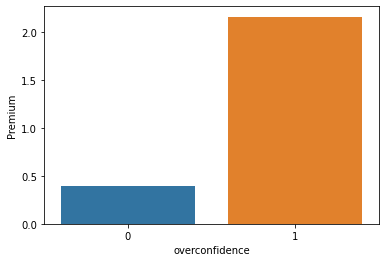

In [1710]:
###GRAPHS
x=Winsorize1['overconfidence']
y= Winsorize1['Premium']
#sns.scatterplot(x,y, showfliers = False)
#sns.boxplot(x,y,showfliers = False,showmeans=True)
#y=y[y<100]
#sns.violinplot(X,y)
# sns.set(rc={'figure.figsize':(21.7,8.27)})
sns.barplot(x, y, data=Winsorize1, ci=None)
plt.show()


In [1711]:
#MEAN
print(Winsorize1.groupby('overconfidence').mean())



                 Premium   Payment         gvkey  not-tech         G  \
overconfidence                                                         
0               0.397470  0.784604  14228.807353  0.603903  0.163715   
1               2.161788  0.760577  20905.380769  0.529808  0.249038   

                relatedness  
overconfidence               
0                  0.827250  
1                  0.858654  


In [1712]:
Winsorize1['Premium'].mean()

0.8794483845547676

In [1713]:

summary_stats = Winsorize1.groupby('overconfidence').describe()
print(summary_stats)

               Premium                                                       \
                 count      mean        std    min   25%  50%   75%     max   
overconfidence                                                                
0               2767.0  0.397470  15.983773 -68.99 -4.05  0.0  4.35  190.97   
1               1040.0  2.161788  19.202708 -68.99 -1.96  0.0  5.26  190.97   

               Payment            ...    G       relatedness            \
                 count      mean  ...  75%   max       count      mean   
overconfidence                    ...                                    
0               2767.0  0.784604  ...  0.0  13.0      2767.0  0.827250   
1               1040.0  0.760577  ...  0.0  13.0      1040.0  0.858654   

                                                   
                     std  min  25%  50%  75%  max  
overconfidence                                     
0               0.378100  0.0  1.0  1.0  1.0  1.0  
1               0.348546 